# Basic learning algorithms without a teacher and text data processing (Scikit-learn lib)
### Sofiia Stokop, FB-21mp

In [1]:
import numpy as np
import pandas as pd
import time
import string
import tarfile
import nltk
from nltk.corpus import stopwords

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud

### 1. Зниження розмірності і візуалізація даних

In [2]:
df = pd.read_csv("C:\\Users\\100ko\\Jupyter Notebooks\\DA_Labs\\rating\\Video_games_esrb_rating.csv", sep=",", low_memory=False)
df.keys()

Index(['title', 'console', 'alcohol_reference', 'animated_blood', 'blood',
       'blood_and_gore', 'cartoon_violence', 'crude_humor', 'drug_reference',
       'fantasy_violence', 'intense_violence', 'language', 'lyrics',
       'mature_humor', 'mild_blood', 'mild_cartoon_violence',
       'mild_fantasy_violence', 'mild_language', 'mild_lyrics',
       'mild_suggestive_themes', 'mild_violence', 'no_descriptors', 'nudity',
       'partial_nudity', 'sexual_content', 'sexual_themes',
       'simulated_gambling', 'strong_janguage', 'strong_sexual_content',
       'suggestive_themes', 'use_of_alcohol', 'use_of_drugs_and_alcohol',
       'violence', 'esrb_rating'],
      dtype='object')

In [3]:
df=df.drop(['title'], axis = 1)
s = df['esrb_rating']
s, unique = pd.factorize(s)
df['esrb_rating'] = s
df.info()
df=df.drop(['cartoon_violence', 'crude_humor','cartoon_violence','console','animated_blood', 'mild_fantasy_violence', 
            'mild_language', 'mild_lyrics','mild_suggestive_themes', 'mild_violence', 'mild_blood', 
            'mild_cartoon_violence','strong_janguage', 'strong_sexual_content','suggestive_themes', 
            'use_of_alcohol', 'partial_nudity','sexual_themes', 'simulated_gambling'],axis = 1)

continuousColumns = ['alcohol_reference','blood','blood_and_gore','drug_reference','fantasy_violence','intense_violence',
                     'language', 'lyrics', 'mature_humor','no_descriptors', 'nudity', 
                     'sexual_content', 'use_of_drugs_and_alcohol', 'violence', 'esrb_rating']
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   console                   1895 non-null   int64
 1   alcohol_reference         1895 non-null   int64
 2   animated_blood            1895 non-null   int64
 3   blood                     1895 non-null   int64
 4   blood_and_gore            1895 non-null   int64
 5   cartoon_violence          1895 non-null   int64
 6   crude_humor               1895 non-null   int64
 7   drug_reference            1895 non-null   int64
 8   fantasy_violence          1895 non-null   int64
 9   intense_violence          1895 non-null   int64
 10  language                  1895 non-null   int64
 11  lyrics                    1895 non-null   int64
 12  mature_humor              1895 non-null   int64
 13  mild_blood                1895 non-null   int64
 14  mild_cartoon_violence     1895 non-null 

alcohol_reference           int64
blood                       int64
blood_and_gore              int64
drug_reference              int64
fantasy_violence            int64
intense_violence            int64
language                    int64
lyrics                      int64
mature_humor                int64
no_descriptors              int64
nudity                      int64
sexual_content              int64
use_of_drugs_and_alcohol    int64
violence                    int64
esrb_rating                 int64
dtype: object

In [4]:
minMaxScaler = MinMaxScaler()
scaledColums = pd.DataFrame(minMaxScaler.fit_transform(df[continuousColumns]),columns=continuousColumns)

In [5]:
pca = PCA()   
X_pca = pca.fit_transform(scaledColums) 
exp_var_pca = pca.explained_variance_ratio_   
cum_sum_eigenvalues = np.cumsum(exp_var_pca) 

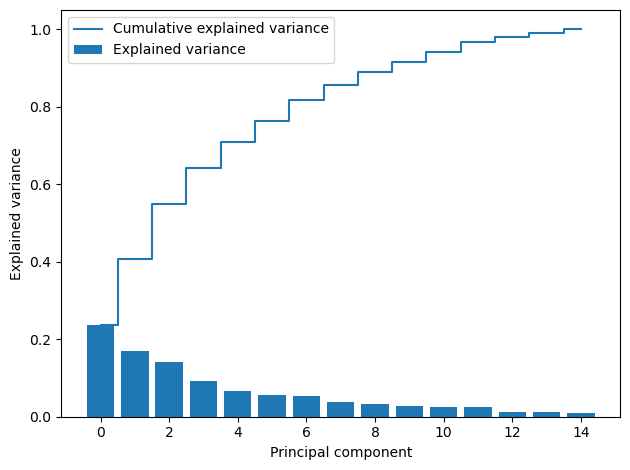

In [6]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

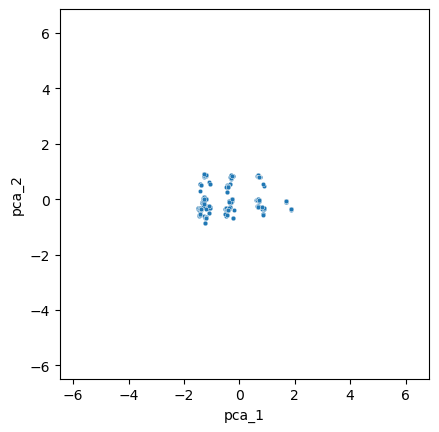

In [7]:
pca = PCA(n_components=2) 
pca_result = pca.fit_transform(df) 

pca_result_df = pd.DataFrame({'pca_1': pca_result[:,0], 'pca_2': pca_result[:,1]}) 

fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', data=pca_result_df, ax=ax,s=10)  
lim = (pca_result.min()-5, pca_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


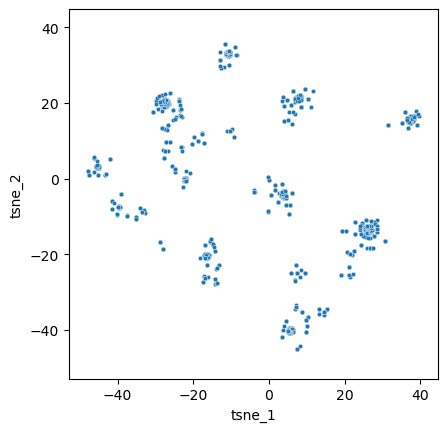

In [8]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(df)
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1]})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', data=tsne_result_df, ax=ax,s=10)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')

### 2. Кластерний аналіз

In [9]:
n_colors = 64
pic = Image.open("C:\\Users\\100ko\\Jupyter Notebooks\\DA_Labs\\pic1.jpg")
pic = np.array(pic, dtype=np.float64)/255
w, h, d = original_shape = tuple(pic.shape)
assert d == 3
image_array = np.reshape(pic, (w * h, d))

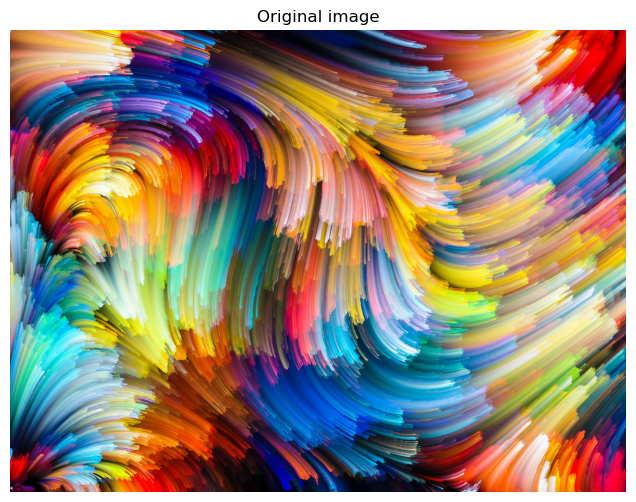

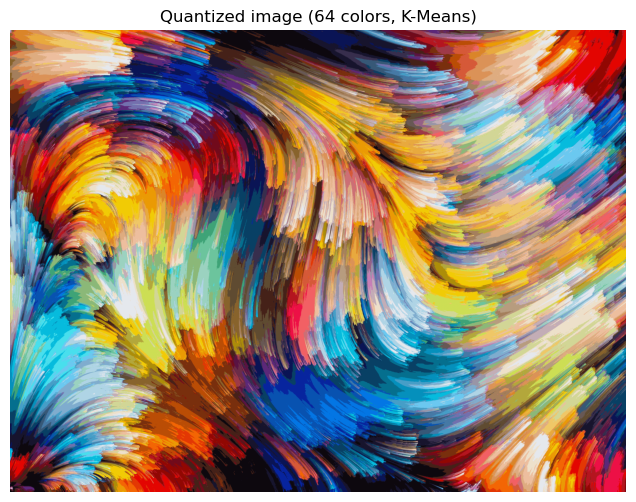

In [10]:
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

plt.figure(1, figsize=(10,6))
plt.clf()
plt.axis('off')
plt.title('Original image')
plt.imshow(pic)

plt.figure(2, figsize=(10,6))
plt.clf()
plt.axis('off')
plt.title(f'Quantized image ({n_colors} colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

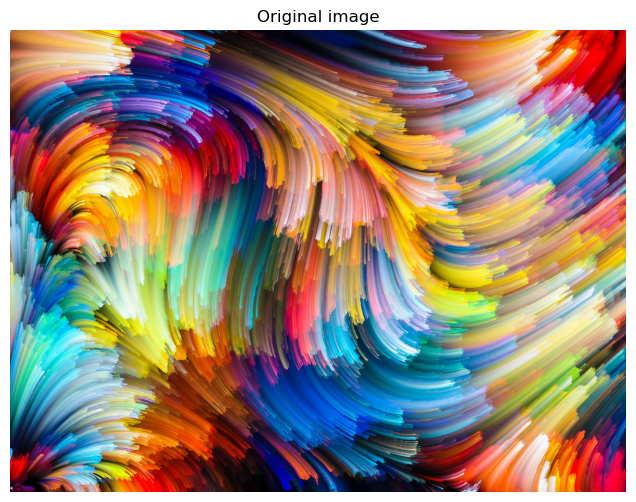

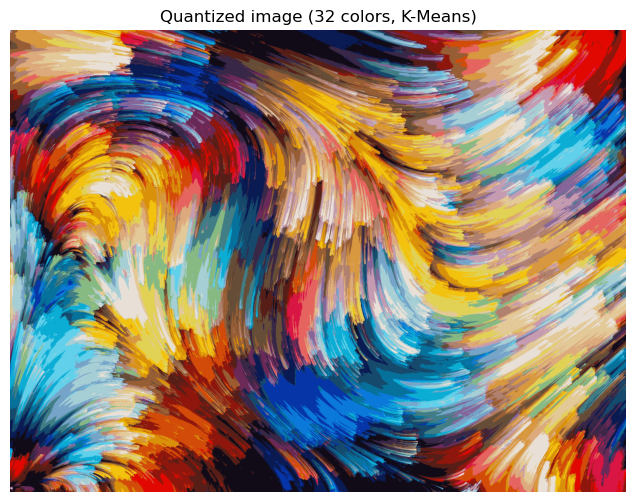

In [11]:
n_colors = 32
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)

plt.figure(1, figsize=(10,6))
plt.clf()
plt.axis('off')
plt.title('Original image')
plt.imshow(pic)

plt.figure(2, figsize=(10,6))
plt.clf()
plt.axis('off')
plt.title(f'Quantized image ({n_colors} colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

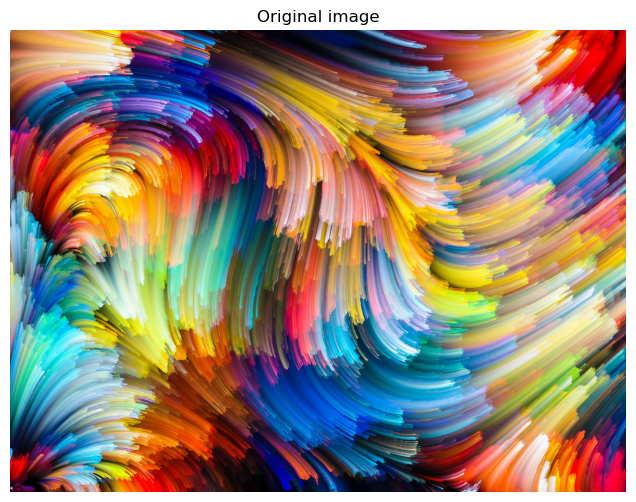

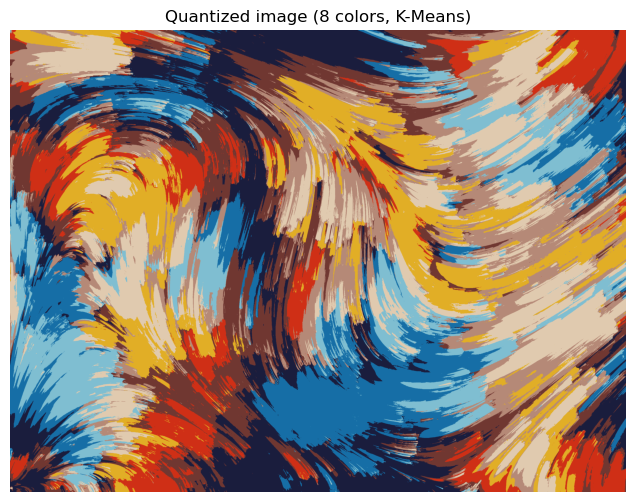

In [13]:
n_colors = 8
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)

plt.figure(1, figsize=(9,6))
plt.clf()
plt.axis('off')
plt.title('Original image')
plt.imshow(pic)

plt.figure(2, figsize=(9,6))
plt.clf()
plt.axis('off')
plt.title(f'Quantized image ({n_colors} colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

### 3. Обробка та класифікація текстових даних

In [14]:
text = pd.read_csv('JEOPARDY_CSV.csv', encoding='latin-1')
text

Show Number    Air Date             Round  \
0              4680  2004-12-31         Jeopardy!   
1              4680  2004-12-31         Jeopardy!   
2              4680  2004-12-31         Jeopardy!   
3              4680  2004-12-31         Jeopardy!   
4              4680  2004-12-31         Jeopardy!   
...             ...         ...               ...   
216925         4999  2006-05-11  Double Jeopardy!   
216926         4999  2006-05-11  Double Jeopardy!   
216927         4999  2006-05-11  Double Jeopardy!   
216928         4999  2006-05-11  Double Jeopardy!   
216929         4999  2006-05-11   Final Jeopardy!   

                               Category  Value  \
0                               HISTORY   $200   
1       ESPN's TOP 10 ALL-TIME ATHLETES   $200   
2           EVERYBODY TALKS ABOUT IT...   $200   
3                      THE COMPANY LINE   $200   
4                   EPITAPHS & TRIBUTES   $200   
...                                 ...    ...   
216925                   RIDDLE ME THIS  $2000   
216926                        "T" BIRDS  $2000   
216927           AUTHORS IN THEIR YOUTH  $2000   
216928                       QUOTATIONS  $2000   
216929                   HISTORIC NAMES   None   

                                                 Question  \
0       For the last 8 years of his life, Galileo was ...   
1       No. 2: 1912 Olympian; football star at Carlisl...   
2       The city of Yuma in this state has a record av...   
3       In 1963, live on "The Art Linkletter Show", th...   
4       Signer of the Dec. of Indep., framer of the Co...   
...                                                   ...   
216925  This Puccini opera turns on the solution to 3 ...   
216926  In North America this term is properly applied...   
216927  In Penny Lane, where this "Hellraiser" grew up...   
216928  From Ft. Sill, Okla. he made the plea, Arizona...   
216929  A silent movie title includes the last name of...   

                                Answer  
0                           Copernicus  
1                           Jim Thorpe  
2                              Arizona  
3                           McDonald's  
4                           John Adams  
...                                ...  
216925                        Turandot  
216926                      a titmouse  
216927                    Clive Barker  
216928                        Geronimo  
216929  Grigori Alexandrovich Potemkin  

[216930 rows x 7 columns]

In [15]:
text.drop(['Show Number',' Air Date', ' Category', ' Value', ' Answer'],axis=1,inplace=True)
text = text.rename(columns={' Round': 'class', ' Question': 'text'})
text.groupby('class').describe()



text          \
                   count  unique   
class                              
Double Jeopardy!  105912  105702   
Final Jeopardy!     3631    3631   
Jeopardy!         107384  107108   
Tiebreaker             3       3   

                                                                          
                                                                top freq  
class                                                                     
Double Jeopardy!                                       [video clue]    6  
Final Jeopardy!   Objects that pass closer to the sun than Mercu...    1  
Jeopardy!                                              [audio clue]   17  
Tiebreaker        A Longfellow poem & a Lillian Hellman play abo...    1

In [16]:
text = text.drop(text[text['class'] == "Tiebreaker"].index)
text.groupby('class').describe()

text          \
                   count  unique   
class                              
Double Jeopardy!  105912  105702   
Final Jeopardy!     3631    3631   
Jeopardy!         107384  107108   

                                                                          
                                                                top freq  
class                                                                     
Double Jeopardy!                                       [video clue]    6  
Final Jeopardy!   Objects that pass closer to the sun than Mercu...    1  
Jeopardy!                                              [audio clue]   17

In [17]:
def process_text(msg):    #прибираємо стопслова, пунктуацію, специмволи
    nopunc = [char for char in msg if char not in string.punctuation]
    nopunc = ''.join(nopunc)    
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_words

In [18]:
from collections import Counter  #скільки для кожного класу
Counter(text['class'])

Counter({'Jeopardy!': 107384,
         'Double Jeopardy!': 105912,
         'Final Jeopardy!': 3631})

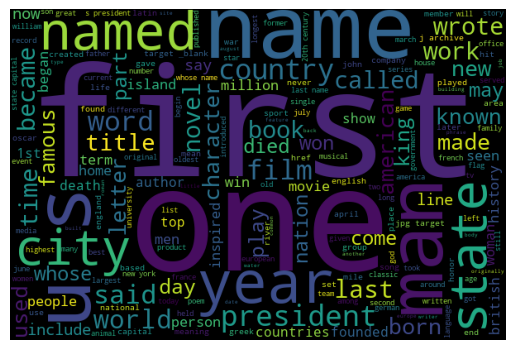

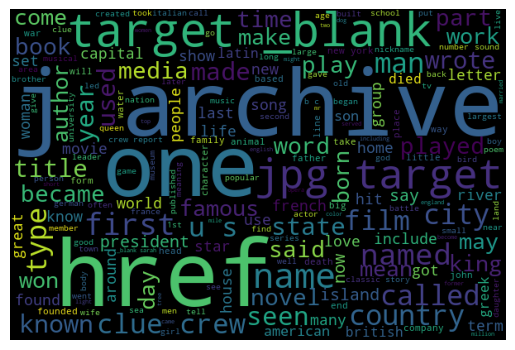

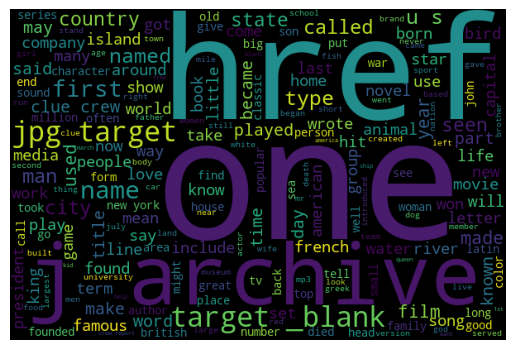

In [19]:
#За допомогою wordcloud зробіть візуалізацію найбільш поширених слів або n-gram у кожному класі

def visualize(label):   
    msg = ''
    for words in text[text['class'] == label]['text']:
        words = words.lower()
        msg += words + ' ' 
    wordcloud = WordCloud(width=600, height=400, background_color="black").generate(msg)#облако слов
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

visualize('Final Jeopardy!')
visualize('Double Jeopardy!')
visualize('Jeopardy!')



In [21]:
text['text'].apply(process_text).head()
msg_train, msg_test, class_train, class_test = train_test_split(text['text'],text['class'],test_size=0.2)

In [22]:
#Векторизуйте тексти

vectorizer = CountVectorizer(stop_words='english') 
msg_train_transformed = vectorizer.fit_transform(msg_train)
msg_test_transformed = vectorizer.transform(msg_test)

                  precision    recall  f1-score   support

Double Jeopardy!       0.55      0.57      0.56     21236
 Final Jeopardy!       0.50      0.00      0.01       719
       Jeopardy!       0.56      0.56      0.56     21431

        accuracy                           0.55     43386
       macro avg       0.54      0.38      0.37     43386
    weighted avg       0.55      0.55      0.55     43386

Accuracy:  0.552920296869958


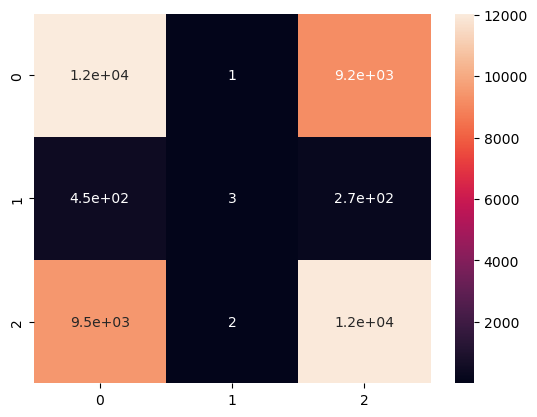

In [23]:
#Проведіть класифікацію текстових даних, зробіть оцінку якості

rfc = RandomForestClassifier()
rfc.fit(msg_train_transformed, class_train)
predictions = rfc.predict(msg_test_transformed)

print(classification_report(class_test,predictions))
print('Accuracy: ', accuracy_score(class_test,predictions))
sns.heatmap(confusion_matrix(class_test,predictions),annot=True)
plt.show()